# Лабораторная работа 1. Нейронные сети.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Мы уверены, что выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за всю работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

Обратите внимание, что мы не ставим оценку за просто написанный код, корректная работоспособность которого не подтверждена экспериментами.

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_01.ipynb.

# Часть 2. Fine-tuning обученных нейросетей

В этой части задания вам предстоит поработать с настоящими монстрами: сетями с почти сотней слоёв и десятками миллионов параметров. Например, такими:

![img](https://alexisbcook.github.io/assets/inception.png)
<center>googlenet inception v3</center>

Если внимательно всмотреться в картинку, можно заметить, что синим цветом обозначены свёрточные слои, красным — pooling, зелёным — конкатенация входов и т.п.

__Чем кормить такого монстра?__

Огромные нейросети обучаются на огромных массивах данных. В компьютерном зрении таких несколько, но самый популярный из них [ImageNet](http://image-net.org/). В этой выборке более миллиона изображений.

Задача этой сети состоит в классификации каждого изображения в один из 1000 классов. Вот они:

In [1]:
!wget https://github.com/yandexdataschool/Practical_DL/raw/fall18/_under_construction/week04_finetuning/other_frameworks/classes.pkl

--2018-09-26 09:03:26--  https://github.com/yandexdataschool/Practical_DL/raw/fall18/_under_construction/week04_finetuning/other_frameworks/classes.pkl
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall18/_under_construction/week04_finetuning/other_frameworks/classes.pkl [following]
--2018-09-26 09:03:27--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall18/_under_construction/week04_finetuning/other_frameworks/classes.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30577 (30K) [text/plain]
Saving to: 'classes.pkl.2'

classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle
import skimage.io

classes = pickle.load(open('classes.pkl','rb'))
print(classes[::100])

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


## Зоопарк нейросетей в keras

Если вы дошли до этого задания, значит вы уже знакомы с библиотекой Керас. Так вот, в ней кроме всего прочего, есть зоопарк предобученных нейросетей: [__`keras.applications`__](https://keras.io/applications/).

Ниже пример кода, который загружает обученную модель с картинки выше ([здесь](https://keras.io/applications/#inceptionv3) можно узнать о ней подробнее).

**Внимание!**
InceptionV3 требует много памяти для работы. Если ваш ПК начинает зависать:
* закройте всё кроме jupyter и браузера с одной вкладкой;
* если не помогло, загрузите эту тетрадку в [google colab](https://colab.research.google.com/) и работайте там;
* замените `zoo.InceptionV3` на `zoo.MobileNet`. Однако в этом случае вам придётся исправить и предобработку картинок.

Выберете оптимальный для вас вариант и начнем работу!

In [2]:
import keras, keras.layers as L
import keras.applications as zoo

model = zoo.InceptionV3(include_top=True, weights='imagenet')

model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

Функция ниже позволяет найти для заданного изображения топ10 классов по мнению InceptionV3.

In [3]:
from skimage.transform import resize
def predict_top10(img):
    img = resize(img, (299, 299), mode='reflect')
    assert img.min() >= 0.0 and img.max() <= 1.0
    plt.imshow(img)
    plt.show()

    img_preprocessed = zoo.inception_v3.preprocess_input(img[None] * 255)
    probs = model.predict(img_preprocessed)[0]
    labels = probs.argsort()[-1:-10:-1]

    print('top-10 classes:')
    for l in labels:
        print('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

Проверим, как она работает на близкой к обучающей выборке картинке:

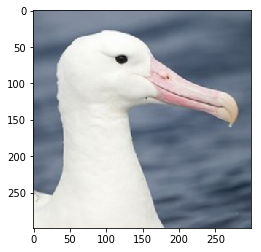

top-10 classes:
0.9282	albatross
0.0016	turnstile
0.0008	drake
0.0005	collie
0.0004	hammerhead
0.0004	Shetland sheepdog
0.0004	nipple
0.0004	cello
0.0004	goose


In [7]:
predict_top10(plt.imread('albatross.jpg'))

А теперь попробуем ее на чем-то неожиданном!

--2018-09-21 16:50:36--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Распознаётся cdn.com.do (cdn.com.do)… 2400:cb00:2048:1::ac40:c10e, 2400:cb00:2048:1::ac40:c00e, 172.64.193.14, ...
Подключение к cdn.com.do (cdn.com.do)|2400:cb00:2048:1::ac40:c10e|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg [переход]
--2018-09-21 16:50:36--  https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Подключение к cdn.com.do (cdn.com.do)|2400:cb00:2048:1::ac40:c10e|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 51048 (50K) [image/jpeg]
Сохранение в: «img.jpg»

img.jpg             100%[===================>]  49,85K  --.-KB/s    за 0,01s   

2018-09-21 16:50:36 (3,85 MB/s) - «img.jpg» сохранён [51048/51048]



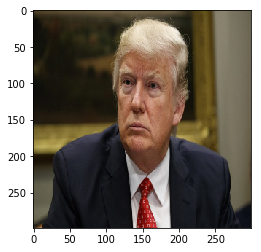

top-10 classes:
0.2418	suit
0.0915	groom
0.0294	Windsor tie
0.0111	wig
0.0095	oboe
0.0082	academic gown
0.0072	bow tie
0.0055	notebook
0.0050	mortarboard


In [8]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg
predict_top10(plt.imread('img.jpg'))

## Dogs Vs Cats

А теперь попробуем построить классификатор, который отличает изображение кошки от собаки. 

![img](https://dingo.care2.com/pictures/greenliving/1203/1202163.large.jpg)

Код ниже позволяет вам загрузить данные, необходимые для данного задания.

In [6]:
# !wget https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1 -O data.zip
# !unzip data.zip

## Sklearn way

**Задание 2.1 (1 балл)** В вашем распоряжении есть предобученная сеть InceptionV3. Ваша задача — обучить классификатор из sklearn (на ваш выбор), который будет отличать котов от собак, используя __активации нейронной сети в качестве признаков__.

Для начала, прочитайте данные и сформируйте для вашего классификатора обучающую и тестовую выборки в пропорции 4:1. 

В вашем распоряжении всего 25 000 изображений различного размера, все в формате JPEG. Все картинки лежат в папке __`./train`__. Изображения кошек имеют название вида `./train/cat.*.jpg`, собак — `./train/dog.*.jpg`.

Считайте данные и для каждой картинки вычислите признаки из промежуточного слоя свёрточной сети. В качестве признаков можно выбрать какой-нибудь слой или несколько слоёв сети. Попробуйте найти комбинацию слоёв, которая работает лучше всего.

[Здесь](https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer) можно почитать как посчитать активацию промежуточных слоёв.

Найдем названия всех картинок, которые у нас есть

In [4]:
names = next(os.walk('train'))[2]
print(names[1])
print(names[-1])

dog.12415.jpg
dog.5870.jpg


Скачаем все картинки и поставим всем кошечкам в соответсвие 0, а собачкам - 1.

In [5]:
images = []
labels = []
for name in names:
    image = skimage.io.imread('train/' + name)
    images.append(image)
    if 'cat' in name:
        labels.append(0)
    else:
        labels.append(1)

Посмотрим на распределение классов внутри нашей выборки. Видим, что кол-во собачек и кошечек одинаковое, что хорошо

In [6]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([12500, 12500]))

Заметим, что все картинки имеют различный размер, поэтому для того чтобы применять предобученную сеть нужно привести все картинки к одному, походящему для сети, размеру (обрезать). Чтобы не делать этот препроцессинг каждый раз, сделаем его сразу для всех картинок один раз и сохраним.

In [7]:
images = np.array(images)

In [8]:
%%time
images = [zoo.inception_v3.preprocess_input(resize(img, (299, 299), mode='reflect')[None] * 255).reshape(299, 299, 3) for img in images]

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


CPU times: user 6min 45s, sys: 8min 8s, total: 14min 53s
Wall time: 4min 56s


Разделите данные на обучение и тест в отношении 4:1.

Разделим выборку на train и test, не забывая до этого перемешать данные (так как, можно заметить, что сначала идут кошечки, а потом собачки). Ну или просто будем использовать train_test_split, который делает это по умолчанию

In [11]:
from sklearn.cross_validation import train_test_split

images = np.array(images)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Напишем функцию, которая будет возвращать выходы нейронов в слое i.

In [13]:
from keras import backend as K
import keras, keras.layers as L
from keras.models import Model

Using TensorFlow backend.
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [14]:
def get_layer_by_number(i):
    return Model(inputs = [model.layers[0].input], outputs = [model.layers[i].output])

def predict_layer_output(images, i, new_model):
    probs = new_model.predict(np.array(images))
    return probs

Теперь начнем подбирать подходящие слои, чьи выходы мы будем рассматривать в качестве новых признаков.

Кажется, что выходы последнего слоя должны быть очень информативны(ведь это вероятности принадлежности к 1000 классам). Поэтому в качестве признаков будем брать их и выходы еще какого-то слоя. Кроме того, понятно что неглубокие слои брать не нужно, глубокие слои будут больше похожи на признаки в привычном их понимании.

Также заметим, что было бы лучше проверять качество на валидационной выборке, а не на тестовой, но в связи с небольшим количеством данных и учебной цели данного практикума, будем валидироваться на тесте.

Итак, напишем функцию, которая будет принимать в аргументах классификатор и показывать accuracy на тесте при обучении даннного классификатора на признаках, построенных как выход каких-то слоев предобученной сети (для разных таких слоев).

In [14]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

Посмотрим на результаты, полученные при взятии выходов предпоследнего слоя Inception в качестве фичей и обучении Log-регрессии.

In [18]:
from tqdm import tqdm_notebook

l = 311
new_model = Model(inputs = [model.layers[0].input], outputs = [model.layers[l].output])
X_train_new = np.zeros((len(X_train), 2048), dtype='float16')
X_test_new = np.zeros((len(X_test), 2048), dtype='float16')

for i in tqdm_notebook(range(len(X_train) // 1000)):
    X_train_new[i*1000: (i + 1) * 1000] = new_model.predict(X_train[i*1000: (i + 1) * 1000])
    predict_layer_output(X_train[i*1000: (i + 1) * 1000], l, new_model)

for i in tqdm_notebook(range(len(X_test) // 1000)):
    X_test_new[i*1000: (i + 1) * 1000] = new_model.predict(X_test[i*1000: (i + 1) * 1000])
    


Обучите поверх этих признаков классификатор из sklearn (можно попробовать несколько и выбрать лучший). Попробуйте получить ROC-AUC __хотя бы 99%__.

In [19]:
clf = LogisticRegression()
clf.fit(X_train_new, y_train)
prediction = clf.predict(X_test_new)
test_acc = accuracy_score(y_test, prediction)
test_roc_auc = roc_auc_score(y_test, prediction)
print('{} layer, test accuracy : {}, roc_auc : {}'.format(l, test_acc, test_roc_auc))

311 layer, test accuracy : 0.9928, roc_auc : 0.9927597562316794


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Получилось довольно хорошо. Посмотрим на другие слои

In [49]:
def check_some_layers(layers):
    for l in layers:
        new_model = Model(inputs = [model.layers[0].input], outputs = [model.layers[l].output])
        X_train_new = new_model.predict(X_train).reshape(len(X_train), -1)
        X_test_new = new_model.predict(X_test).reshape(len(X_test), -1)

        print('dim of features = ',  X_train_new.shape[1])
        clf = LogisticRegression()
        clf.fit(X_train_new, y_train)
        prediction = clf.predict(X_test_new)
        test_acc = accuracy_score(y_test, prediction)
        test_roc_auc = roc_auc_score(y_test, prediction)
        print('{} layer, test accuracy : {}, roc_auc : {}'.format(l, test_acc, test_roc_auc))

In [50]:
check_some_layers([150, 200, 250, 300])

dim of features =  46240
150 layer, test accuracy : 0.8608, roc_auc : 0.8609739687078931
dim of features =  55488
200 layer, test accuracy : 0.9664, roc_auc : 0.966419023265054
dim of features =  28672
250 layer, test accuracy : 0.9888, roc_auc : 0.9887850500204026
dim of features =  20480
300 layer, test accuracy : 0.9912, roc_auc : 0.9911680487984875


Ну, видим, что самый лучший результат получился при рассмотрении предпоследнего слоя.

**Задание 2.2 (0.5 балла)** Опишите ваши выводы о проделанной работе.

Самой трудной работой было обработать картинки, то есть сделать их одинакового размера и применить к ним преобразование zoo.inception_v3.preprocess_input. Так оно все не влезало в память и пришлось делать это batch-ами, переодически записывая результаты в память и перезапуская питон-бук) 

Интуитивно понятно, что взятие в качестве признаков выходы предпоследнего слоя должно работать хорошо. Очень классно, что практически ничего не сделав (скачав сеть/предобработав картинки) обучили обычную log-регрессию и получили такий хороший результат. Конечно, пришлось находить предсказания i-го слоя для всех данных, но это в любом случае в разы быстрее, чем обучить всю нейронку.

Также можно заметить, что при увеличении номера рассматриваемого слоя увеличивается качество классификатора. С одной стороны, это логично, так как более глубокие слои содержат меньше признаков (что проще для классификатора) и эти признаки больше похожи на признаки в обычном их понимании (то есть более высокоуровневые). Но с другой стороны, кажется, что слои под номерами $\geq$ 150 тоже достаточно глубокие и должны давать не сильно меньший accuracy и roc-auc, однако, например, слой с номером 150 дал результат в разы хуже.

## Fine-tuning

**Задание 2.3 (2 балла)** Давайте попробуем добиться ещё большего качества через дообучение (fine-tuning) модели. Новая цель — получить качество лучше, чем у классификатора из предыдущего пункта на признаках `InceptionV3`. Цель этого задания: получить значение ROC-AUC __не меньше 99.5%__.

__Шаг 1.__  Постройте сеть, в которой InceptionV3 "без головы" используется в качестве первого слоя. Поверх неё надстройте новую голову из `keras.layers` — она будет отличать котов от собак. Это можно сделать с помощью [общего интерфейса модели](https://keras.io/models/model/).

Таааксс, ну что мы можем сделать с вектором размера 2048? Кажется логичным сделать несколько полносвязных слоев с dropout или batch-normalization. 

Также я пробовала добавить только один dense с активацией softmax, чтобы сделать нейронку аналогичную Inception, но различающую только кошек и собак : в предположении, что предпоследний слой Inception уже примерно умеет понимать какие-то важные фичи про картинки, можно было бы уже после этого этапа сказать, кто кошка, а кто собака. Но такое плохо сработало.

In [111]:
inception_layer = model.layers[-2].output
dense1 = L.Dense(512, activation='relu')(inception_layer)
norm = L.BatchNormalization()(dense1)

dense2 = L.Dense(64, activation='relu')(norm)
dropout2 = L.Dropout(0.25)(dense2)
dense3 = L.Dense(2, activation='softmax')(dropout2)

add_model = Model(inputs=[model.layers[0].input], output=[dense3])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  if __name__ == '__main__':


__Шаг 2.__ Обучите "голову" на обучающей выборке, не меняя весов изначальной сети. Частично обучать сеть в keras можно [вот так](https://keras.io/getting-started/faq/#how-can-i-freeze-keras-layers).

__Sanity check:__ После этого шага ваша модель должна уже быть сравнима по точности с моделями из задания 1.

Если всё получилось, самое время [сохранить модель](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model).

Эпох не много, так как не хочется переобучиться. (Да, конечно, можно и использовать EarlyStopping)

In [112]:
for l in add_model.layers[:-5]:
    l.trainable = False
    
add_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
add_model.fit(X_train, y_train, epochs=7)

Epoch 1/7
20000/20000 [==============================] - 272s 14ms/step - loss: 0.0895 - acc: 0.9662
Epoch 2/7
20000/20000 [==============================] - 271s 14ms/step - loss: 0.0607 - acc: 0.9761
Epoch 3/7
20000/20000 [==============================] - 271s 14ms/step - loss: 0.0552 - acc: 0.9792
Epoch 4/7
20000/20000 [==============================] - 272s 14ms/step - loss: 0.0541 - acc: 0.9793
Epoch 5/7
20000/20000 [==============================] - 271s 14ms/step - loss: 0.0494 - acc: 0.9808
Epoch 6/7
20000/20000 [==============================] - 271s 14ms/step - loss: 0.0453 - acc: 0.9829
Epoch 7/7
20000/20000 [==============================] - 271s 14ms/step - loss: 0.0434 - acc: 0.9832


In [114]:
add_model.fit(X_train, y_train, epochs=1)

Epoch 1/1
20000/20000 [==============================] - 271s 14ms/step - loss: 0.0394 - acc: 0.9855


In [115]:
prediction = np.argmax(add_model.predict(X_test), axis=1)
test_acc = accuracy_score(y_test, prediction)
test_roc_auc = roc_auc_score(y_test, prediction)
print('test accuracy : {}, roc_auc : {}'.format(test_acc, test_roc_auc))

test accuracy : 0.9852, roc_auc : 0.985429545695034


Ну, данный результат,конечно, отличается от того, что мы получили ранее. Что кажеься очень странным. Все таки там была log-regression, а здесь целый набор линейных функций, да еще и с какими-то нелинейностями, dropout-ами и прочим.


Сохраняем полученную модель

In [116]:
add_model.save('add_model.h5') 

__Шаг 3.__ "Разморозьте" несколько предыдущих слоёв модели и продолжите обучение. На этом этапе важно не переобучиться: смотрите на качество на валидации.

Если качество не улучшается, а сразу идёт вниз, попробуйте уменьшить число обучаемых слоёв или воспользуйтесь [аугментацией данных](https://keras.io/preprocessing/image/). В общем случае, всегда полезно помнить про аугментацию данных даже если и без неё всё работает — иногда она творит [чудеса](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced).

Делаем аугументацию

In [123]:
from keras.preprocessing.image import ImageDataGenerator

augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

augmenter.fit(X_train)

И дообучаемся

In [126]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

for l in add_model.layers[-10:]:
    l.trainable = True
for l in add_model.layers[:-10]:
    l.trainable = False
    
earlystopper = EarlyStopping(patience=2, verbose=1)
callbacks_list = [earlystopper]
add_model.fit_generator(augmenter.flow(X_train, y_train, batch_size=64),
                    steps_per_epoch=len(X_train) / 64, epochs=5, validation_data=[X_test, y_test], 
                        callbacks=callbacks_list, verbose=1)

Epoch 1/5
313/312 [==============================] - 430s 1s/step - loss: 0.0488 - acc: 0.9812 - val_loss: 0.0872 - val_acc: 0.9794
Epoch 2/5
313/312 [==============================] - 420s 1s/step - loss: 0.0453 - acc: 0.9832 - val_loss: 0.0699 - val_acc: 0.9854
Epoch 3/5
313/312 [==============================] - 420s 1s/step - loss: 0.0459 - acc: 0.9823 - val_loss: 0.0532 - val_acc: 0.9868
Epoch 4/5
313/312 [==============================] - 416s 1s/step - loss: 0.0410 - acc: 0.9830 - val_loss: 0.0857 - val_acc: 0.9788
Epoch 5/5
313/312 [==============================] - 412s 1s/step - loss: 0.0444 - acc: 0.9830 - val_loss: 0.0901 - val_acc: 0.9790
Epoch 00005: early stopping


Попробуем разморозить еще 5 слоев в Inception и еще пообучать

In [130]:
for l in add_model.layers[-15:]:
    l.trainable = True

add_model.fit_generator(augmenter.flow(X_train, y_train, batch_size=64),
                    steps_per_epoch=len(X_train) / 64, epochs=2, validation_data=[X_test, y_test], 
                        callbacks=callbacks_list, verbose=1)

Epoch 1/5
313/312 [==============================] - 435s 1s/step - loss: 0.0428 - acc: 0.9862 - val_loss: 0.0783 - val_acc: 0.9814
Epoch 2/5
313/312 [==============================] - 440s 1s/step - loss: 0.0393 - acc: 0.9873 - val_loss: 0.0679 - val_acc: 0.9842
Epoch 3/5
313/312 [==============================] - 430s 1s/step - loss: 0.0410 - acc: 0.9851 - val_loss: 0.0652 - val_acc: 0.9838
Epoch 4/5
313/312 [==============================] - 437s 1s/step - loss: 0.0382 - acc: 0.9910 - val_loss: 0.0597 - val_acc: 0.9888
Epoch 5/5
313/312 [==============================] - 442s 1s/step - loss: 0.0344 - acc: 0.9934 - val_loss: 0.0601 - val_acc: 0.9874


__Шаг 4.__ Вычислите финальное качество.

In [83]:
prediction = np.argmax(add_model.predict(X_test), axis=1)
test_acc = accuracy_score(y_test, prediction)
test_roc_auc = roc_auc_score(y_test, prediction)
print('test accuracy : {}, roc_auc : {}'.format(test_acc, test_roc_auc))

test accuracy : 0.9874, roc_auc : 0.98753944598204


**Задание 2.4 (0.5 балла)** Напишите отчёт и вознаградите себя за старания чем-нибудь.

Нуу, не получилось. Качество после дообучения стало хуже, чем было при использовании log-регрессии.
Возможно, мы переобучились, но судя по значениям на это не похоже.
Я пыталась менять кол-во обучаемых слоев в Inception, но это особо не помогало, максимальный roc-auc, которого удалось добиться - около 0.991, что все еще хуже, чем в первом задании. 
Наверно стоило, написать более глубокую голову, но свертки здесь не подходят, rnn-ки тоже, а писать 10 полносвязных слоев чередуя их dropout-ами или batch-norm-ами кажется странным.

# Всё сделали, но азарт не прошел?

В таких случаях можно пробовать следующие техники:
* Ансамбль из нескольких предобученных нейросетей. Bagging? Stacking? Boosting? Всё что пожелаете.
* Более честный эксперимент: разделяем данные на train/__dev__/test, все сравнения делаем по dev, а test используем только в самом конце.
* Аугментировать данные картинками из интернета. Уж чего, а котиков и собачек там хватает.